# Exploration  

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from cdlib import viz
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
#from pyvis import network as net
from cdlib import algorithms, viz
from difflib import get_close_matches
from collections import Counter
from difflib import SequenceMatcher

# Movies

In [3]:
data_movies_old = pd.read_csv("./CSV_files/movies_communities_metadata.csv")
all_movies = pd.read_csv("./CSV_files/all_movies_metadata.csv")
movie_table = pd.read_csv("./CSV_files/movies_communities_table_scraping_done.csv")
movie_table_old = pd.read_csv("./CSV_files/movies_communities_table.csv")
data_movies = pd.read_csv("./CSV_files/movies_communities_metadata_scraping_done.csv")

In [4]:
data_movies_old

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_genres,Movie_release_year,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,0,10408933,/m/02qc0j7,Alexander's Ragtime Band,"{'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...",1938.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,171005,/m/016ywb,Henry V,"{'/m/04xvh5': 'Costume drama', '/m/082gq': 'Wa...",1989.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,77856,/m/0kcn7,Mary Poppins,"{'/m/0hj3myq': ""Children's/Family"", '/m/04t36'...",1964.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,612710,/m/02wjqm,New Rose Hotel,"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",1999.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,156558,/m/014k4y,Baby Boy,"{'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...",2001.0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16609,16609,1918494,/m/0660qx,State and Main,"{'/m/0gf28': 'Parody', '/m/09n5t_': 'Americana...",2000.0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16610,16610,24209227,/m/07k5mlk,"The Time, the Place and the Girl","{'/m/05p553': 'Comedy film', '/m/02l7c8': 'Rom...",1946.0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
16611,16611,15394941,/m/03m6zh4,Gopi Kishan,"{'/m/07s9rl0': 'Drama', '/m/02kdv5l': 'Action'...",1994.0,0,0,9,0,...,0,0,0,0,0,0,0,0,0,0
16612,16612,23851782,/m/06_vb43,The Ghost Train,"{'/m/0lsxr': 'Crime Fiction', '/m/01jfsb': 'Th...",1941.0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_movies

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,...,11,12,13,14,15,16,17,18,19,20
0,0,975900,/m/03vyhn,Ghosts of Mars,['English Language'],{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",2001.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
1,1,10408933,/m/02qc0j7,Alexander's Ragtime Band,['English Language'],{'/m/09c7w0': 'United States of America'},"{'/m/04t36': 'Musical', '/m/01z4y': 'Comedy', ...",1938.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,175026,/m/017n1p,Sarah and Son,['English Language'],{'/m/09c7w0': 'United States of America'},"{'/m/07s9rl0': 'Drama', '/m/01g6gs': 'Black-an...",1930.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,171005,/m/016ywb,Henry V,['English Language'],{'/m/07ssc': 'United Kingdom'},"{'/m/04xvh5': 'Costume drama', '/m/082gq': 'Wa...",1989.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,77856,/m/0kcn7,Mary Poppins,['English Language'],{'/m/09c7w0': 'United States of America'},"{'/m/0hj3myq': ""Children's/Family"", '/m/04t36'...",1964.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27237,27237,664006,/m/030xw6,Guilty as Sin,[],{'/m/09c7w0': 'United States of America'},"{'/m/01jfsb': 'Thriller', '/m/0glj9q': 'Erotic...",1993.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27238,27238,24209227,/m/07k5mlk,"The Time, the Place and the Girl",['English Language'],{'/m/09c7w0': 'United States of America'},"{'/m/05p553': 'Comedy film', '/m/02l7c8': 'Rom...",1946.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27239,27239,15394941,/m/03m6zh4,Gopi Kishan,['Hindi Language'],{'/m/03rk0': 'India'},"{'/m/07s9rl0': 'Drama', '/m/02kdv5l': 'Action'...",1994.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27240,27240,23851782,/m/06_vb43,The Ghost Train,['English Language'],{'/m/07ssc': 'United Kingdom'},"{'/m/0lsxr': 'Crime Fiction', '/m/01jfsb': 'Th...",1941.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_movies.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
# To be removed once the data has been done properly
data_movies = data_movies.merge(all_movies,left_on='Wikipedia_movie_ID',right_on='Wikipedia_movie_ID',suffixes=('', '_y'))
data_movies.drop(['Unnamed: 0_y','Unnamed: 0',	'Freebase_movie_ID_y',	'Movie_name_y', 'Movie_genres_y',	'Movie_release_year_y'],axis=1,inplace=True)

KeyError: "['Unnamed: 0_y'] not found in axis"

### formatting

In [ ]:
# function that coverts the string to a dictionary
def convert_to_dict(string):
    if isinstance(string, str):
        if string == '{}':
            return {}
        else:
            string = string.replace('{', '').replace('}', '').replace('"', '').replace("'",'')
            string = string.split(',')
            string = [x.split(':') for x in string]
            dictionnary = {x[0].strip(): x[1].strip() for x in string}
            return dictionnary

# function that converts the string to a list
def clean_dict(elt):
    if ':' in elt:
        elt = elt[elt.index(':') + 1 : ]
    elt = elt.strip()
    return elt

def convert_to_list(cell):
    if isinstance(cell, str):
        if cell == '{}':
            return []
        if cell == '[]':
            return []
        else:
            cell = cell.replace('[', '').replace(']', '').replace('"', '').replace("'",'')
            cell = cell.replace('{', '').replace('}', '')
            cell = cell.split(',')
            cell = [clean_dict(x) for x in cell]
            return cell


In [ ]:
# apply the function to the genres column
data_movies['Movie_genres'] = data_movies['Movie_genres'].apply(convert_to_list)
# apply the same function as Movies_genre to the countries column
data_movies['Movie_countries'] = data_movies['Movie_countries'].apply(convert_to_list)

# apply the function to the language column
data_movies['Movie_languages'] = data_movies['Movie_languages'].apply(convert_to_list)


# apply the function to the genres column
all_movies['Movie_genres'] = all_movies['Movie_genres'].apply(convert_to_list)
# apply the same function as Movies_genre to the countries column
all_movies['Movie_countries'] = all_movies['Movie_countries'].apply(convert_to_list)

# apply the function to the language column
all_movies['Movie_languages'] = all_movies['Movie_languages'].apply(convert_to_list)

In [ ]:
for i in range(1,21):
    vars()['datamov' + str(i)]= data_movies[~(data_movies[str(i)] == 0)]

In [ ]:
data_movies
datamov11

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,3,...,11,12,13,14,15,16,17,18,19,20
109,2574970,/m/07p15p,Big Wars,[],[Japan],"[Science Fiction, Anime, Japanese Movies, Anim...",1993.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,12169608,/m/02vs6jw,Ben 10: Secret of the Omnitrix,[English Language],[United States of America],"[Science Fiction, Childrens/Family, Fantasy, D...",2007.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,670013,/m/031f_m,Final Fantasy VII: Advent Children,[Japanese Language],[Japan],"[Thriller, Science Fiction, Japanese Movies, C...",2005.0,2.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,6773730,/m/0gn7zp,Konjiki no Gash Bell!!: 101 Banme no Mamono,[Japanese Language],[Japan],"[Anime, Japanese Movies]",2004.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,4704148,/m/0cj6db,Baron Omatsuri and the Secret Island,[Japanese Language],[Japan],"[Japanese Movies, Animation, Mystery, Anime, D...",2005.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,4458000,/m/0c3jpx,Dream Soccer King!,[Japanese Language],[Japan],"[Short Film, Japanese Movies, Comedy, Animation]",2002.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26762,25394470,/m/09g6j10,Pokémon: Zoroark: Master of Illusions,"[Japanese Language, English Language]",[],"[Action/Adventure, Thriller, Action, Fantasy]",2010.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26847,30859078,/m/08dz4r,Dragon Ball Z: Bio-Broly,"[Japanese Language, English Language]",[Japan],"[Action, Anime, Japanese Movies, Science Ficti...",1994.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26907,11841904,/m/02rv7tv,Seigi Choujin vs. Ancient Choujin,[Japanese Language],[Japan],"[Japanese Movies, Animation]",1985.0,0.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Number of movies by communities

In [ ]:
nb_movie = []
for com in range(1,21):
    nb_movie.append(len(data_movies[~(data_movies[str(com)] == 0)]))

[8071, 7548, 3989, 5213, 3350, 1007, 2269, 2805, 1959, 1706, 259, 1044, 823, 317, 1227, 578, 516, 412, 224, 236] 20


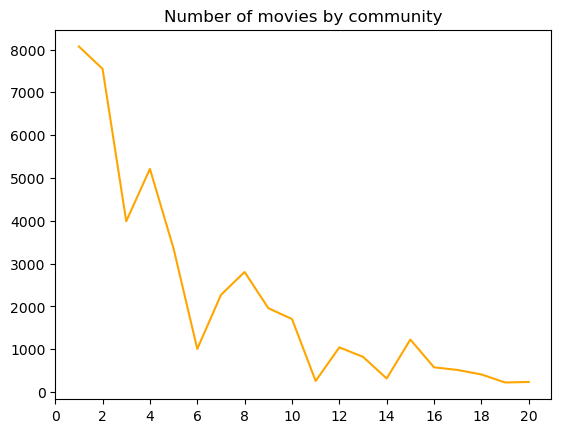

In [ ]:
plt.plot(range(1,21),nb_movie,color = 'orange')
print(nb_movie, len(nb_movie))
ax = plt.xticks(range(0,21,2))
ax = plt.title('Number of movies by community')

In [ ]:
fig = px.line(x=range(1,21),y=nb_movie,
                    title='Number of movies by community', labels={'x':'community','y':'nb of movies'},
                    template= 'plotly_white',color_discrete_sequence=['orange'])
fig.show()
fig.write_html('C:/Users/Public/ADA2022/weloic.github.io/_includes/movies_community_scatter.html')

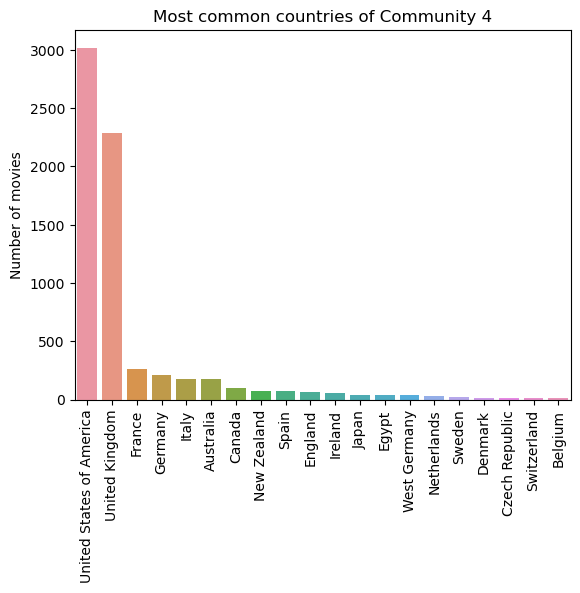

List of countries of movie production
['United States of America', 'United Kingdom', 'France', 'Germany', 'Italy', 'Australia', 'Canada', 'New Zealand', 'Spain', 'England', 'Ireland', 'Japan', 'Egypt', 'West Germany', 'Netherlands', 'Sweden', 'Denmark', 'Czech Republic', 'Switzerland', 'Belgium', 'Mexico', 'Yugoslavia', 'Norway', 'India', 'Luxembourg', 'Austria', 'Hungary', 'South Africa', 'Finland', 'Hong Kong', 'Kingdom of Great Britain', 'Poland', 'Russia', 'Argentina', 'Israel', 'Scotland', 'Romania', 'Greece', 'Iceland', 'Brazil', 'Soviet Union', 'German Democratic Republic', 'Panama', 'Croatia', 'China', 'Portugal', 'South Korea', 'Zimbabwe', 'Morocco', 'Singapore', 'Czechoslovakia', 'Iran', 'Malta', 'Lithuania', 'Crime', 'Malaysia', 'Indonesia', 'Slovakia', 'Thailand', 'Tunisia', 'Cyprus', 'Libya', 'Pakistan', 'Aruba']
List of countries


In [ ]:
#print(data_mov4.Movie_countries.unique())

# visualize the most common countries
#plt.figure(figsize=(10, 10))
plt.title('Most common countries of Community 4')
plt.ylabel('Number of movies')
sns.barplot(x=[x for x, y in Counter([x for y in datamov4['Movie_countries'].values for x in y]).most_common(
    20)], y=[y for x, y in Counter([x for y in datamov4['Movie_countries'].values for x in y]).most_common(20)])
plt.xticks(rotation=90)
plt.show()

print('List of countries of movie production')
print([x for x, y in Counter([x for y in datamov4['Movie_countries'].values for x in y]).most_common()])

print('List of countries')
#print([x for x, y in Counter([y for y in data_mov4['Movie_languages'].values]).most_common()])

## Movies Distribution per Year

In [ ]:
data_movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,3,...,12,13,14,15,16,17,18,19,20,Sum_com
0,975900,/m/03vyhn,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",1938.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,175026,/m/017n1p,Sarah and Son,[English Language],[United States of America],"[Drama, Black-and-white]",1930.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,171005,/m/016ywb,Henry V,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",1989.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,77856,/m/0kcn7,Mary Poppins,[English Language],[United States of America],"[Childrens/Family, Musical, Fantasy, Comedy, D...",1964.0,0.00,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27237,664006,/m/030xw6,Guilty as Sin,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri...",1993.0,0.75,0.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27238,24209227,/m/07k5mlk,"The Time, the Place and the Girl",[English Language],[United States of America],"[Comedy film, Romance Film, Musical]",1946.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27239,15394941,/m/03m6zh4,Gopi Kishan,[Hindi Language],[India],"[Drama, Action, Crime, Comedy]",1994.0,0.00,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27240,23851782,/m/06_vb43,The Ghost Train,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",1941.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


     1    2    3    4    5    6    7    8    9   10  ...   12   13   14   15  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  ...  0.0  0.0  0.0  3.0   
1  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  8.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  4.0  0.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    16   17   18   19   20  Movie_release_year  
0  0.0  0.0  0.0  0.0  0.0              2001.0  
1  0.0  0.0  0.0  0.0  0.0              1938.0  
2  0.0  0.0  0.0  0.0  0.0              1930.0  
3  0.0  0.0  0.0  0.0  0.0              1989.0  
4  0.0  0.0  0.0  0.0  0.0              1964.0  

[5 rows x 21 columns]
   1  2  3  4  5  6  7  8  9  10  ...  12  13  14  15  16  17  18  19  20  \
0  0  0  0  0  0  0  0  1  0   0  ...   0   0   0   1   0   0   0   0   0   
1  0  1  0  0  0  0  0  0  0   0  ...   0   0   

Text(0.5, 1.0, 'Movie Distribution over Years and Communities')

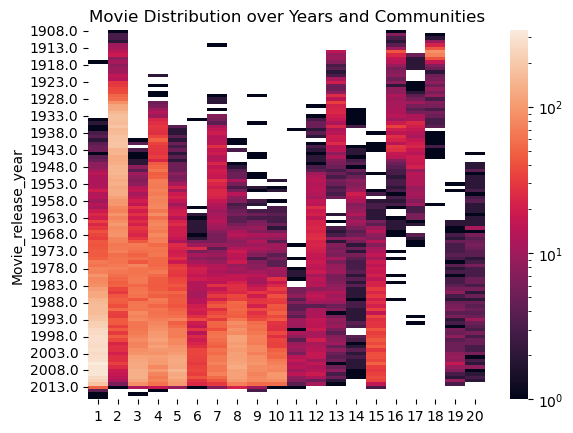

In [ ]:
from matplotlib.colors import LogNorm, Normalize

coms  =  np.arange(1,21)
#data_movies['Sum_com'] = data_movies[coms.astype(str)].sum(axis=1)
#data_movies[coms.astype(str)] = data_movies.apply(lambda x : x[coms.astype(str)]/x.Sum_com,axis=1)
#data_movies['Sum_com'] = data_movies.apply(lambda x : x.Sum_com/x.Sum_com,axis=1)
movies_year_com = data_movies[coms.astype(str)]
movies_year_com['Movie_release_year'] = data_movies['Movie_release_year']
print(movies_year_com.head(5))
for y in coms.astype(str):
    movies_year_com[y] = movies_year_com[y].apply(lambda x : 1 if (x != 0) else  0)
print(movies_year_com.head(5))
movies_year_com = movies_year_com.groupby('Movie_release_year').agg('sum')
#movies_year_com.drop(['Unnamed: 0','Wikipedia_movie_ID','Movie_box_office_revenue','Movie_runtime'],axis=1,inplace=True)
#movies_year_com.drop(['Wikipedia_movie_ID'],axis=1,inplace=True)
#
#movies_year_com.drop(['Unnamed: 0'],axis=1,inplace=True)


#Sanity Check
#print(movies_year_com['Sum_com'].sum(),'movies in total')
#print(movies_year_com[coms.astype(str)].sum(axis=1).sum())
    
#movies_year_com.drop(['Sum_com'],axis=1,inplace=True)
sns.heatmap(data=movies_year_com, norm=LogNorm())
plt.title('Movie Distribution over Years and Communities')

In [ ]:
list = [3,4]+[5,6]
list

[3, 4, 5, 6]

Text(0.5, 1.0, 'Movie Distribution over Years and Communities')

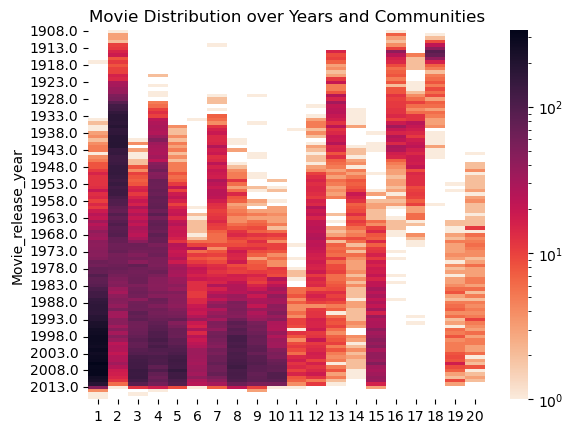

In [ ]:
sns.heatmap(data=movies_year_com, norm=LogNorm(),cmap = 'rocket_r')
plt.title('Movie Distribution over Years and Communities')

In [ ]:
data_movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,3,...,12,13,14,15,16,17,18,19,20,Sum_com
0,975900,/m/03vyhn,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,1.0
1,10408933,/m/02qc0j7,Alexander's Ragtime Band,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]",1938.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,175026,/m/017n1p,Sarah and Son,[English Language],[United States of America],"[Drama, Black-and-white]",1930.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,171005,/m/016ywb,Henry V,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",1989.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,77856,/m/0kcn7,Mary Poppins,[English Language],[United States of America],"[Childrens/Family, Musical, Fantasy, Comedy, D...",1964.0,0.00,0.571429,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27237,664006,/m/030xw6,Guilty as Sin,[],[United States of America],"[Thriller, Erotic thriller, Psychological thri...",1993.0,0.75,0.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27238,24209227,/m/07k5mlk,"The Time, the Place and the Girl",[English Language],[United States of America],"[Comedy film, Romance Film, Musical]",1946.0,0.00,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27239,15394941,/m/03m6zh4,Gopi Kishan,[Hindi Language],[India],"[Drama, Action, Crime, Comedy]",1994.0,0.00,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27240,23851782,/m/06_vb43,The Ghost Train,[English Language],[United Kingdom],"[Crime Fiction, Thriller, Comedy, Supernatural]",1941.0,0.00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
movies_year_com

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Movie_release_year,,,,,,,,,,,,,,,,,,,,
1908.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.000000,0.750000,0.0,0.000000,0.000000,0.0
1909.0,0.000000,1.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.000000,5.666667,0.0,0.111111,0.000000,0.0
1910.0,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.000000,1.333333,0.0,1.333333,0.000000,0.0
1911.0,0.000000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.000000,1.400000,0.0,8.200000,0.000000,0.0
1912.0,0.000000,9.400000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.0,0.000000,4.000000,0.0,20.600000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,128.412543,1.089535,72.805159,18.388472,66.005534,20.994613,9.893330,26.100612,21.657764,45.22264,4.000,8.777778,0.111111,0.0,5.707576,0.000000,0.0,0.000000,1.833333,0.0
2013.0,35.140079,0.333333,10.050000,5.931746,7.950000,0.100000,1.878968,6.986111,4.678571,0.25000,0.125,0.000000,0.000000,0.0,0.576190,0.000000,0.0,0.000000,0.000000,0.0
2014.0,2.558333,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.241667,0.00000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


# Actors

In [ ]:
dataactors = pd.read_csv("./CSV_files/top_20_communities_scraping_done.csv")
# # As we did with the previous column, we will get the year from the actor date of birth column
# data['Actor_year_of_birth'] = data['Actor_date_of_birth'].str.split(
#     '-').str[0]
# # drop the actor date of birth column
# data.drop(['Actor_date_of_birth'], axis=1, inplace=True)
# # show the number of missing values in the actor year of birth column
# data['Actor_year_of_birth'].isnull().sum()
# data.Actor_year_of_birth =  pd.to_datetime(data.Actor_year_of_birth)
# data['Actor_year_of_birth'] = data['Actor_year_of_birth'].dt.year

In [ ]:
# data[data['Actor_name']=='Prabhu Deva']
# data[data['Actor_name']=='James Garner']
dataactors

,Freebase_actor_ID,connectivity,Community,Wikidata_ID,actor_country_of_citizenship,actor_occupation
0,/m/0f5xn,157,1,Q172678,United States of America,"['film actor', 'actor', 'film producer', 'voic..."
1,/m/028k57,128,1,Q312129,Canada,"['screenwriter', 'film actor', 'actor', 'film ..."
2,/m/01vy_v8,125,1,Q311319,United States of America,"['film director', 'actor', 'puppeteer', 'scree..."
3,/m/0pz91,123,1,Q132952,United States of America,"['actor', 'television actor', 'film actor', 'f..."
4,/m/01wbg84,123,1,Q104061,United States of America,"['television actor', 'film actor', 'film direc..."
...,...,...,...,...,...,...
6072,/m/0bx63ms,3,20,NaN,NaN,NaN
6073,/m/04bdlg,3,20,Q318885,Japan,"['stage actor', 'film actor', 'television acto..."
6074,/m/0c3l2x,3,20,Q3427943,Sweden,"['actor', 'musician', 'singer']"
6075,/m/02wx5q5,3,20,NaN,NaN,NaN


### Community Sizes

In [ ]:
# data[data['community']==4]
# sns.histplot(data,x="community",bins=20)
# print("community 17: {} actors".format(len(data[data['community']==17])))
# print("community 18: {} actors".format(len(data[data['community']==18])))

# print("community 10: {} actors".format(len(data[data['community']==10])))
# print("community 11: {} actors".format(len(data[data['community']==11])))
# # the top 10 communities have more than 200 people in it. 

Text(0, 0.5, 'Number of actors')

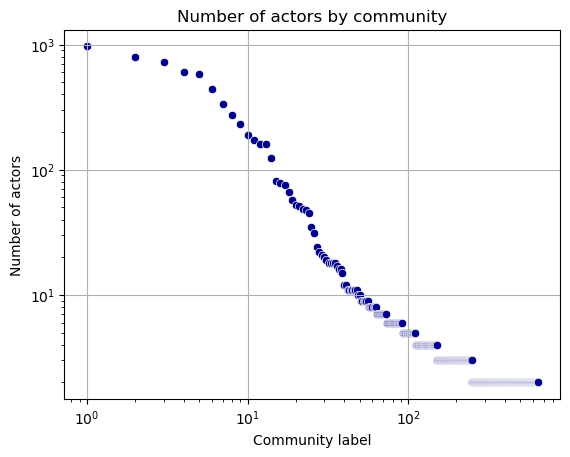

In [ ]:
com_sizes = pd.read_csv('./CSV_files/community_sizes.csv')
sns.scatterplot(data=com_sizes,x='community',y='size',color='darkblue')
plt.yscale('log')
plt.grid('on')
plt.xscale('log')
plt.title('Number of actors by community')
plt.xlabel('Community label')
plt.ylabel('Number of actors')
#plt.vlines(17,0,1000)

In [ ]:
import plotly.express as px
#df = px.data.com_sizes() # iris is a pandas DataFrame
fig = px.scatter(com_sizes, x='community',y='size',
                    title='Number of actors by community',log_x=True,log_y=True,labels=('Community label','Number of actors'),
                    template= 'plotly_white',color_discrete_sequence=['darkblue'])
fig.show()
fig.write_html('C:/Users/Public/ADA2022/weloic.github.io/_includes/community_sizes_scatter.html')

### Actors and Birthyears

In [ ]:
# sns.boxplot(data=data, x="Actor_year_of_birth", y="community",orient = "h",palette = 'bright')

### Nationalities of Actors

In [ ]:
# plt.figure(figsize = (12,12))
# sns.histplot(data= data[data.community < 10], x = 'actor_country_of_citizenship',hue='community', multiple = 'stack', palette = 'bright')
# ax = plt.xticks(rotation = 90)
# plt.yscale('log')

> retravailler le graphe pour normaliser chaque colonne sur 100 ?

# Community features

In [8]:
features = pd.read_csv('./CSV_files/communities_features.csv')

In [9]:
fig = px.bar(features, x="Males_%", y="Community", orientation='h',
             width=400,
             title='Communities Characterization')
fig.show()

In [10]:
features

,Community,Males_%,Females_%,1st_country,1st_country_%,2nd_country,2nd_country_%,3rd_country,3rd_country_%,1st_occupation,1st_occupation_%,2nd_occupation,2nd_occupation_%,3rd_occupation,3rd_occupation_%
0,1,67.936803,32.063197,United States of America,86.862004,United Kingdom,4.442344,Canada,3.875236,voice actor,14.676082,producer,13.662880,writer,12.588271
1,2,67.828685,32.171315,United States of America,80.645161,United Kingdom,9.677419,Canada,3.125000,writer,10.466989,musician,7.246377,director,7.192700
2,3,59.223301,40.776699,India,96.784566,United Kingdom,1.286174,Pakistan,0.482315,director,10.881295,producer,8.453237,model,8.453237
3,4,72.953737,27.046263,United Kingdom,64.579606,United States of America,14.311270,Australia,7.155635,writer,10.410697,producer,7.354346,director,7.067813
4,5,65.068493,34.931507,India,99.024390,Egypt,0.243902,Bhutan,0.243902,director,9.710145,producer,8.695652,writer,5.797101
5,6,72.623574,27.376426,China,58.441558,Hong Kong,18.181818,Taiwan,9.956710,musician,15.702479,director,12.809917,writer,6.611570
6,7,66.911765,33.088235,United States of America,88.973384,Canada,6.463878,United Kingdom,3.422053,voice actor,28.517588,musician,9.170854,writer,7.788945
7,8,70.000000,30.000000,United States of America,74.812030,United Kingdom,6.390977,Spain,6.390977,producer,12.768647,voice actor,12.389381,writer,10.745891
8,9,69.072165,30.927835,United Kingdom,77.157360,Ireland,7.614213,United States of America,7.106599,voice actor,12.149533,writer,11.214953,producer,8.411215
9,10,59.763314,40.236686,India,100.000000,0,0.000000,0,0.000000,director,10.852713,writer,7.751938,producer,5.813953


In [50]:
# each country gets its own trace so that it will have a different color
c1 = features.pivot_table(index='Community',columns='1st_country',values='1st_country_%').fillna(0)
c2 = features.pivot_table(index='Community',columns='2nd_country',values='2nd_country_%').fillna(0)
c3 = features.pivot_table(index='Community',columns='3rd_country',values='3rd_country_%').fillna(0)
countries = c2.add(c1,fill_value=0).add(c3,fill_value=0)
countries.drop('0',axis=1,inplace=True)
countries['Others'] = countries.apply(lambda x: 100 - sum(x),axis=1)

In [52]:
# each occupation gets its own trace so that it will have a different color
o1 = features.pivot_table(index='Community',columns='1st_occupation',values='1st_occupation_%').fillna(0)
o2 = features.pivot_table(index='Community',columns='2nd_occupation',values='2nd_occupation_%').fillna(0)
o3 = features.pivot_table(index='Community',columns='3rd_occupation',values='3rd_occupation_%').fillna(0)
occupations = o2.add(o1,fill_value=0).add(o3,fill_value=0)
occupations['Others'] = occupations.apply(lambda x: 100 - sum(x),axis=1)

In [61]:
countries.columns

Index(['Australia', 'Bhutan', 'Canada', 'China', 'Egypt', 'France', 'Germany',
       'Hong Kong', 'India', 'Ireland', 'Italy', 'Japan', 'Netherlands',
       'Pakistan', 'Portugal', 'Spain', 'Sweden', 'Taiwan', 'United Kingdom',
       'United States of America', 'Others'],
      dtype='object')

In [84]:
# color dictionnary for the interactive plot
# colors are grouped by continent 
color_dict={
    'female_%':'orange',
    'male_%':'red',

    'Others' : 'beige',

    'Australia' : 'red',
    'United States of America' : 'firebrick',
    'United Kingdom': 'indianred' ,
    'Canada': 'darkred',
    
    'India' : 'orange',
    'Bhutan' : 'orangered',
    'Pakistan': 'coral',

    'China' : 'green',
    'Japan' : 'seagreen',
    'Taiwan' : 'lime',
    'Hong Kong' : 'forestgreen',

    'Egypt' : 'gold',

    'Ireland': '#264653', 
    'Italy' : '#298880', #Celadon green
    'France': '#287271', #Skobeloff
    'Germany':'steelblue',
    'Netherlands': 'navy',
    'Portugal' : 'navy',
    'Spain': 'navy',
    'Sweden' : '#264653' #charcoal 


}

In [91]:
fig = make_subplots(rows=1, cols=3,shared_yaxes=True,subplot_titles=('Gender (%)','Nationality  (%)','Occupation (%)'))

fig.add_trace(go.Bar( x=features['Males_%'], y=features['Community'],orientation='h',name = 'male',marker={'color':color_dict['male_%']}),
                row=1, col=1
)
fig.add_trace(go.Bar( x=features['Females_%'], y=features['Community'],orientation='h',name = 'female',marker={'color':color_dict['female_%']}),
                row=1, col=1
)

#Country column
for label in countries.columns:
    fig.add_trace(
        go.Bar( x=countries[label], y=countries.index,orientation='h',name = label,marker={'color':color_dict[label]}),
        row=1, col=2
    )

# Occupation column
for label in occupations.columns:
    fig.add_trace(
        go.Bar( x=occupations[label], y=occupations.index,orientation='h',name = label),
        row=1, col=3
    )

fig.update_layout(height = 600, title_text="The 20 biggest communities distribution of features")
fig.update_layout(barmode = 'stack')
fig['layout']['yaxis']['autorange'] = "reversed"

fig.show()
fig.write_html('C:/Users/Public/ADA2022/weloic.github.io/_includes/top20_characterisation.html')

# Interelationship

In [94]:
relationship = pd.read_csv('./CSV_files/inter-communities-caracteristics.csv')
relationship.drop('Unnamed: 0',axis = 1,inplace = True)

<AxesSubplot:xlabel='Community_2', ylabel='Community_1'>

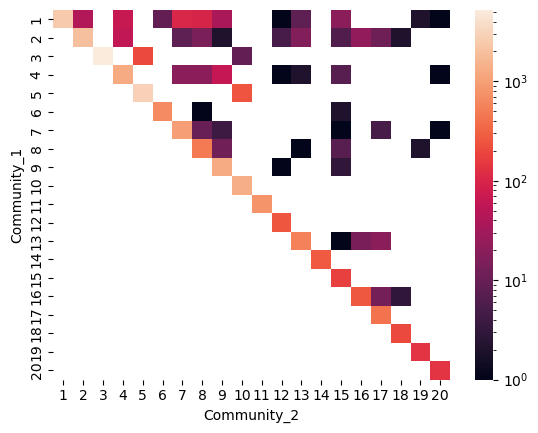

In [100]:
relation_matrix = relationship.pivot_table(index='Community_1',columns='Community_2',values='count')
sns.heatmap(relation_matrix,norm = LogNorm())

# Community 1

In [ ]:
# d1 = data[data['community']==1]
# print('number of actors = ', len(d1))

# print(d1.actor_country_of_citizenship.unique())
# print(len(d1.actor_country_of_citizenship.unique()),"nationalities")
# #sns.histplot(data = d1, x = 'actor_country_of_citizenship')
# sns.barplot(x=d1['actor_country_of_citizenship'].value_counts().index, y=d1['actor_country_of_citizenship'].value_counts().values,palette = 'bright')
# ax = plt.xticks(rotation = 90)
# plt.yscale('log')

> Cleaning need to be done on the nationalities 

Hungary = Kingdom of Hungary \\ 
Kingdom of the Netherlands

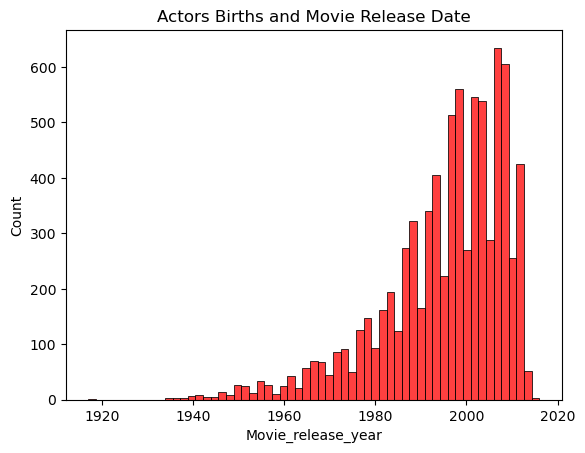

In [ ]:
#sns.histplot(data= d1, x="Actor_year_of_birth")
sns.histplot(data= datamov1, x='Movie_release_year',color='red')
ax = plt.title('Actors Births and Movie Release Date')

<AxesSubplot:xlabel='Movie_release_year'>

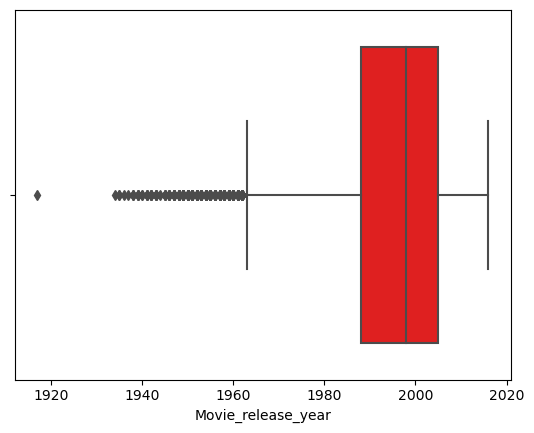

In [ ]:
sns.boxplot(data= datamov1, x='Movie_release_year',color='red')

> plot the distribution of the average age when acting a movie ? 

['Drama', 'Comedy', 'Thriller', 'Romance Film', 'Action', 'Crime Fiction', 'Indie', 'Action/Adventure', 'Adventure', 'Romantic comedy', 'Family Film', 'Crime Thriller', 'Period piece', 'Romantic drama', 'Mystery', 'Film adaptation', 'Comedy-drama', 'Fantasy', 'Science Fiction', 'Horror', 'Black comedy', 'Animation', 'Parody', 'Psychological thriller', 'Coming of age', 'Teen', 'War film', 'Suspense', 'Family Drama', 'Childrens/Family', 'Television movie', 'Sports', 'Musical', 'Biography', 'Buddy film', 'Ensemble Film', 'Biographical film', 'Western', 'Satire', 'Political drama', 'Cult', 'LGBT', 'Slapstick', 'Gangster Film', 'Costume drama', 'Biopic feature', 'Action Thrillers', 'World cinema', 'Supernatural', 'Comedy film', 'Childrens', 'Crime Drama', 'Road movie', 'Short Film', 'Docudrama', 'Courtroom Drama', 'Crime Comedy', 'Superhero movie', 'Black-and-white', 'Screwball comedy', 'Domestic Comedy', 'Fantasy Comedy', 'Sex comedy', 'Family-Oriented Adventure', 'Slasher', 'Comedy of man

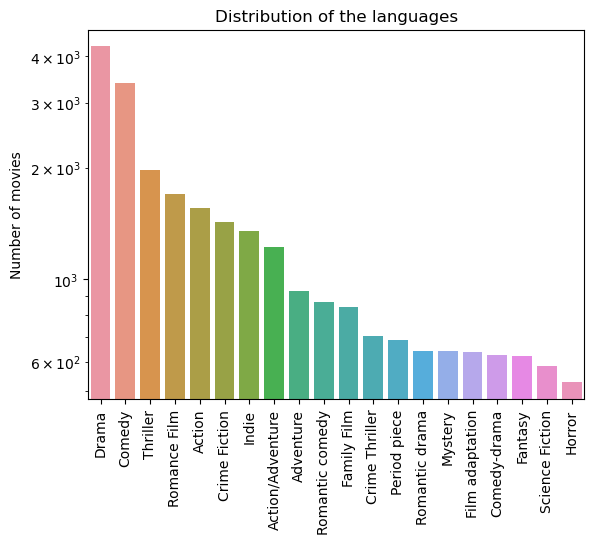

In [ ]:
print([x for x, y in Counter([x for y in datamov1['Movie_genres'].values for x in y]).most_common()])

plt.title('Distribution of the languages')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in datamov1['Movie_genres'].values for x in y]).most_common(20)], y=[
            y for x, y in Counter([x for y in datamov1['Movie_genres'].values for x in y]).most_common(20)])
plt.xticks(rotation=90)
plt.show()

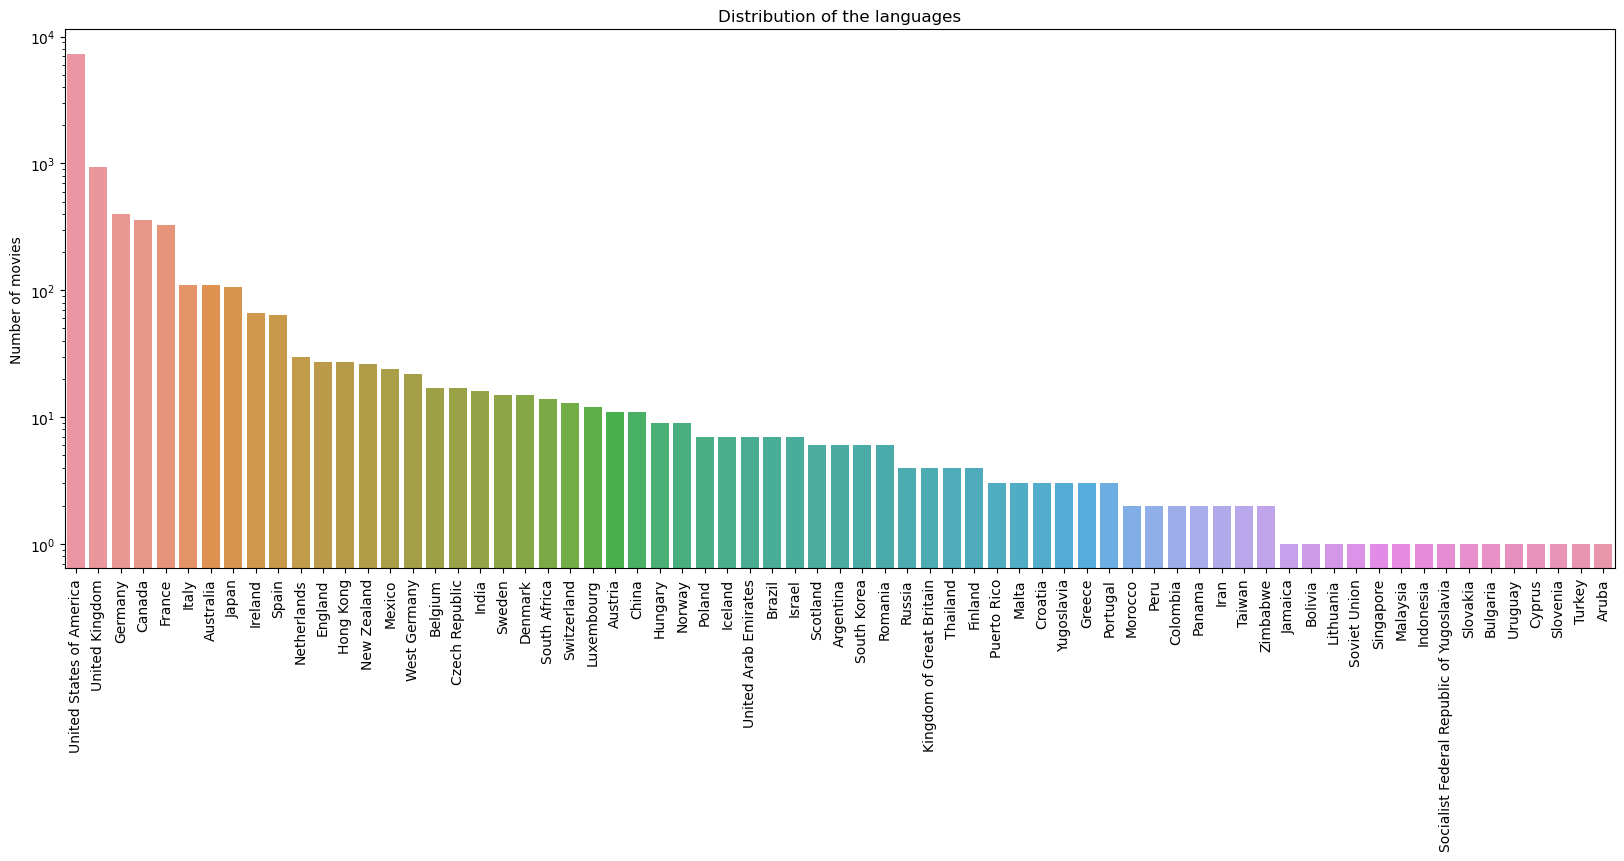

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Distribution of the languages')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in datamov1['Movie_countries'].values for x in y]).most_common()], y=[
            y for x, y in Counter([x for y in datamov1['Movie_countries'].values for x in y]).most_common()])
plt.xticks(rotation=90)
plt.show()

In [ ]:
Counter([x for y in data_mov1['Movie_countries'].values for x in y.values()]).most_common()

[('United States of America', 2287),
 ('United Kingdom', 162),
 ('Germany', 128),
 ('France', 115),
 ('Canada', 76),
 ('Italy', 41),
 ('Japan', 39),
 ('Australia', 27),
 ('Spain', 18),
 ('Ireland', 18),
 ('Sweden', 12),
 ('West Germany', 11),
 ('Denmark', 11),
 ('Hong Kong', 10),
 ('Netherlands', 9),
 ('Mexico', 8),
 ('Norway', 8),
 ('Poland', 7),
 ('Switzerland', 6),
 ('Finland', 6),
 ('New Zealand', 5),
 ('Belgium', 4),
 ('Russia', 4),
 ('Czech Republic', 4),
 ('Romania', 4),
 ('England', 3),
 ('United Arab Emirates', 3),
 ('Argentina', 3),
 ('Yugoslavia', 3),
 ('Luxembourg', 3),
 ('Puerto Rico', 2),
 ('Philippines', 2),
 ('Israel', 2),
 ('Brazil', 2),
 ('South Africa', 2),
 ('Iceland', 2),
 ('Morocco', 1),
 ('Austria', 1),
 ('Thailand', 1),
 ('Kingdom of Great Britain', 1),
 ('South Korea', 1),
 ('Socialist Federal Republic of Yugoslavia', 1),
 ('Iran', 1),
 ('China', 1),
 ('Lithuania', 1),
 ('Scotland', 1),
 ('India', 1),
 ('Taiwan', 1)]

In [ ]:
df = data_mov1[[len(x) == 1 for x in data_mov1.Movie_countries]]

Counter([x for y in df['Movie_countries'].values for x in y.values()]).most_common()
1896/len(df)

0.9595141700404858

In [ ]:
df2 = data_mov1[[len(x) == 4 for x in data_mov1.Movie_countries]]
print(len(df2))
Counter([x for y in df2['Movie_countries'].values for x in y.values()]).most_common()

print(Counter([len(x) for x in data_mov1['Movie_countries'].values]))

22
Counter({1: 1976, 2: 308, 3: 92, 0: 33, 4: 22, 5: 8, 6: 4, 11: 1, 8: 1, 13: 1, 7: 1})


['English Language', 'Spanish Language', 'French Language', '', 'Italian Language', 'German Language', 'Russian Language', 'Japanese Language', 'Arabic Language', 'Latin Language', 'Standard Mandarin', 'Portuguese Language', 'American English', 'Cantonese', 'Hebrew Language', 'Yiddish Language', 'Dutch Language', 'Polish Language', 'Romanian Language', 'Czech Language', 'Korean Language', 'Danish Language', 'Vietnamese Language', 'Norwegian Language', 'Greek Language', 'Chinese language', 'Hungarian language', 'Persian Language', 'Irish', 'Finnish Language', 'American Sign Language', 'Navajo Language', 'Swedish Language', 'Icelandic Language', 'Ukrainian Language', 'Urdu Language', 'Aramaic language', 'Esperanto Language', 'Bulgarian Language', 'Old English language', 'Swahili Language', 'Croatian language', 'Standard Cantonese', 'Hawaiian language', 'Khmer language', 'Quechua', 'Malay Language', 'Mende Language', 'Xhosa Language', 'Zulu Language', 'Scottish Gaelic language', 'Welsh La

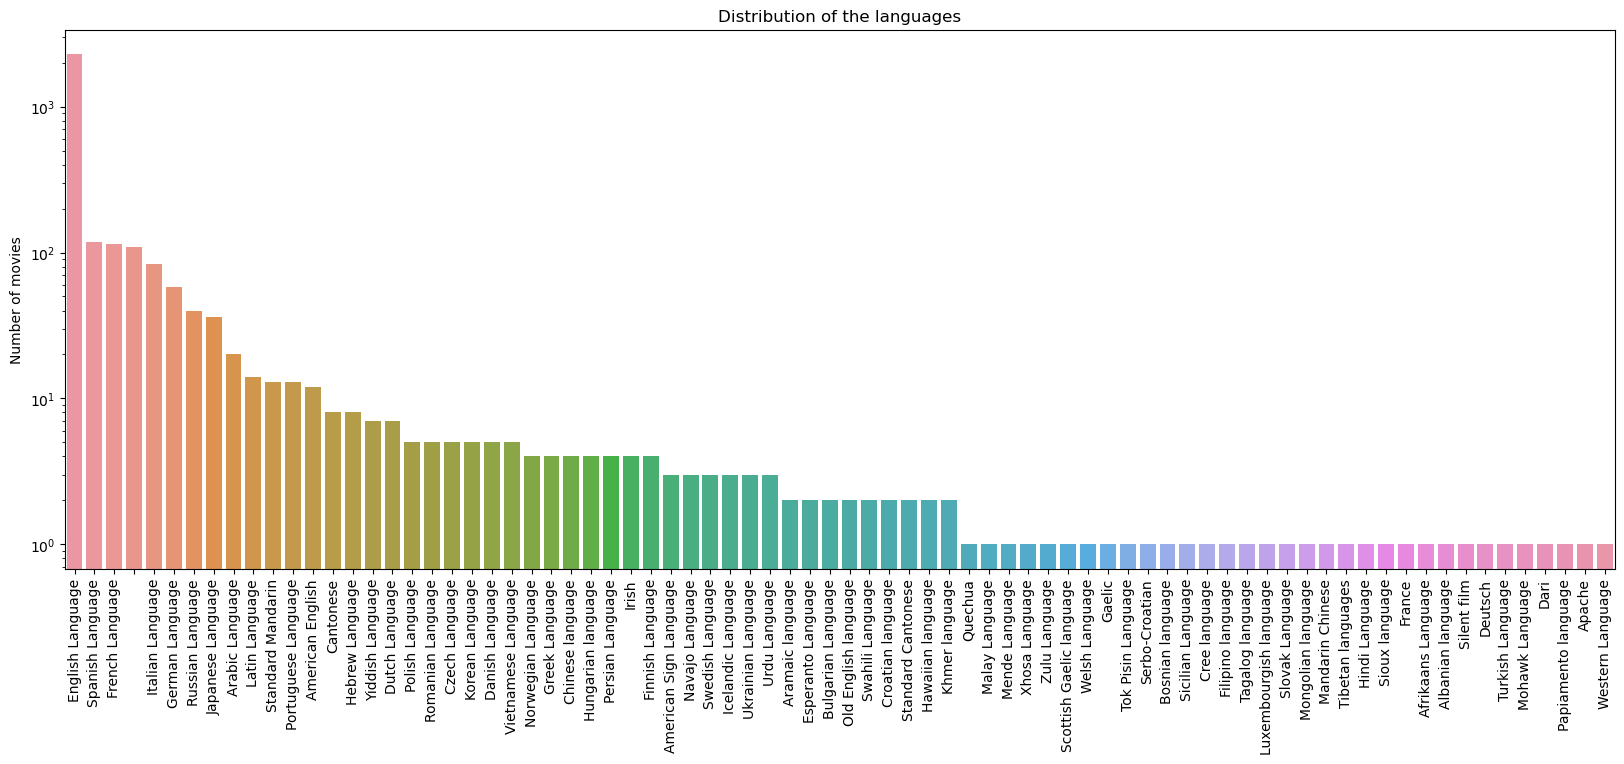

In [ ]:
print([x for x, y in Counter([x for y in data_mov1['Movie_languages'].values for x in y]).most_common()])

plt.figure(figsize=(20,7))
plt.title('Distribution of the languages')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in data_mov1['Movie_languages'].values for x in y]).most_common()], y=[
            y for x, y in Counter([x for y in data_mov1['Movie_languages'].values for x in y]).most_common()])
plt.xticks(rotation=90)
plt.show()

> clean the dataset so that they print the year in the CSV files

# Community 2

<AxesSubplot:xlabel='Movie_release_year', ylabel='Count'>

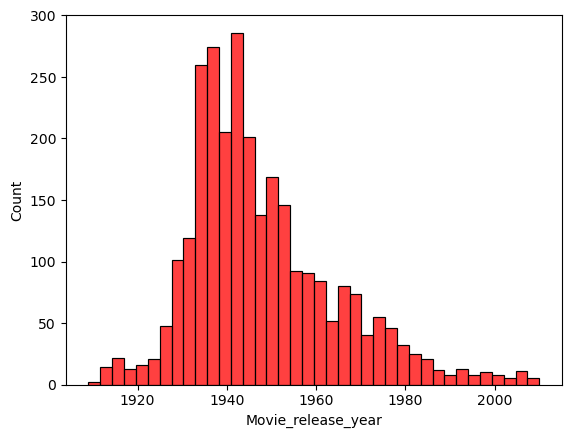

In [ ]:
sns.histplot(data= data_mov2, x='Movie_release_year',color='red')

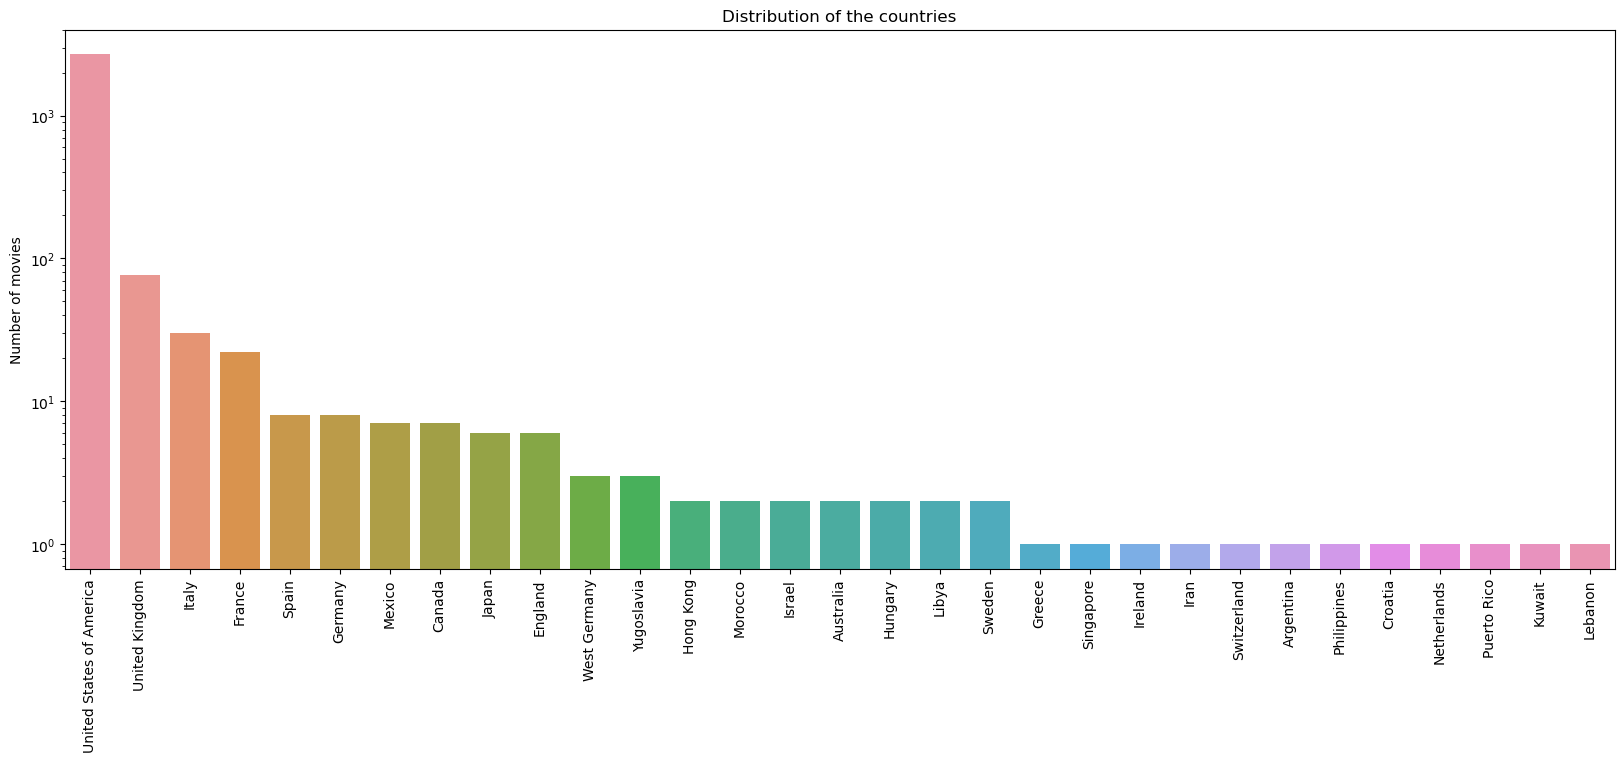

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Distribution of the countries')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in data_mov2['Movie_countries'].values for x in y.values()]).most_common()], y=[
            y for x, y in Counter([x for y in data_mov2['Movie_countries'].values for x in y.values()]).most_common()])
plt.xticks(rotation=90)
plt.show()

In [ ]:
datamov2

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_genres,Movie_release_year,1,2,3,4,5,...,13,14,15,16,17,18,19,20,Movie_languages,Movie_countries
0,10408933,/m/02qc0j7,Alexander's Ragtime Band,"[Musical, Comedy, Black-and-white]",1938.0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
2,77856,/m/0kcn7,Mary Poppins,"[Childrens/Family, Musical, Fantasy, Comedy, D...",1964.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
11,10275424,/m/02q74ng,Woman Hungry,"[Musical, Western]",1930.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
14,14631844,/m/03grb4v,Joan the Woman,"[Silent film, Indie, War film, Epic, Black-and...",1917.0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,"[Silent film, English Language]",[United States of America]
24,12788657,/m/02x4zpv,The Boston Strangler,"[Crime Fiction, Mystery, Thriller, Drama, Crim...",1968.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16585,10979410,/m/02qx1v_,The Barefoot Executive,"[Family Film, Drama, Comedy]",1971.0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
16601,6740261,/m/0glmbl,Eternally Yours,"[Family Drama, Black-and-white, Drama, Comedy,...",1939.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
16602,11350779,/m/02r8kxp,Sherlock Holmes and the Voice of Terror,"[Thriller, Crime Fiction, Detective fiction, D...",1942.0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]
16605,22330502,/m/05sync6,Inspiration,"[Drama, Black-and-white]",1931.0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,[English Language],[United States of America]


Counter({1: 2684, 2: 80, 0: 43, 3: 16, 4: 2, 5: 1})


TypeError: cannot unpack non-iterable int object

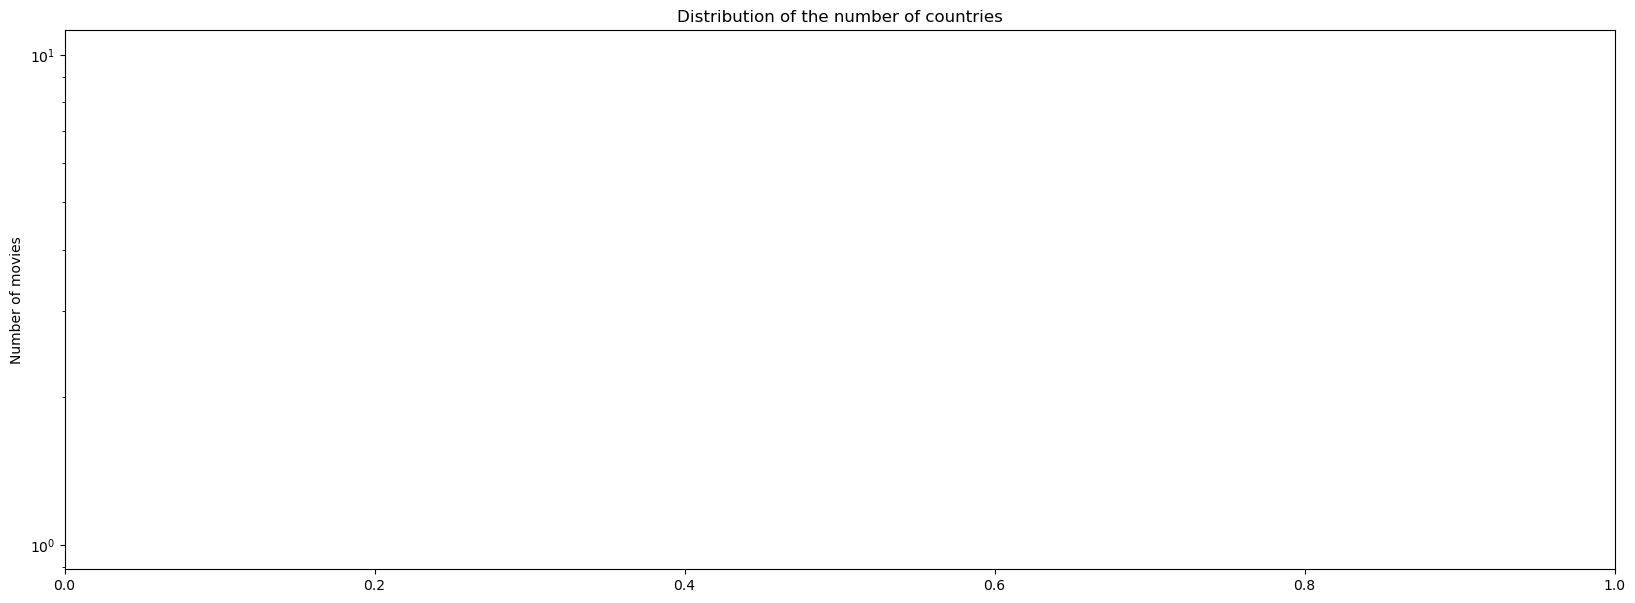

In [ ]:
#df2 = datamov2[[len(x) == 4 for x in data_mov1.Movie_countries]]
print(Counter([len(x) for x in datamov2['Movie_countries'].values]))

plt.figure(figsize=(20,7))
plt.title('Distribution of the number of countries')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([len(x) for x in datamov2['Movie_countries'].values])], y=[
            y for x, y in Counter([len(x) for x in datamov2['Movie_countries'].values])])
plt.xticks(rotation=90)
plt.show()

Way less represented nationalities (less invited people from elsewhere?)

# Community 3 

<AxesSubplot:xlabel='Movie_release_year'>

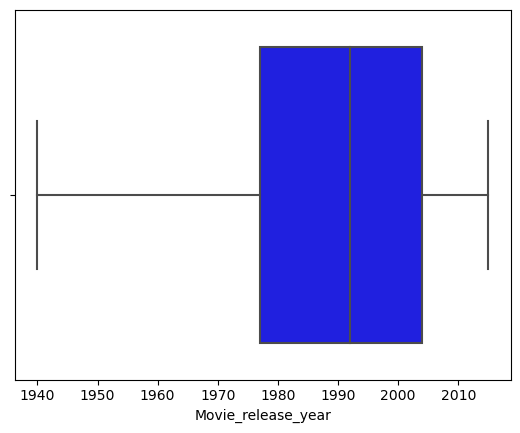

In [ ]:
sns.boxplot(data= data_mov3, x='Movie_release_year',color='blue')

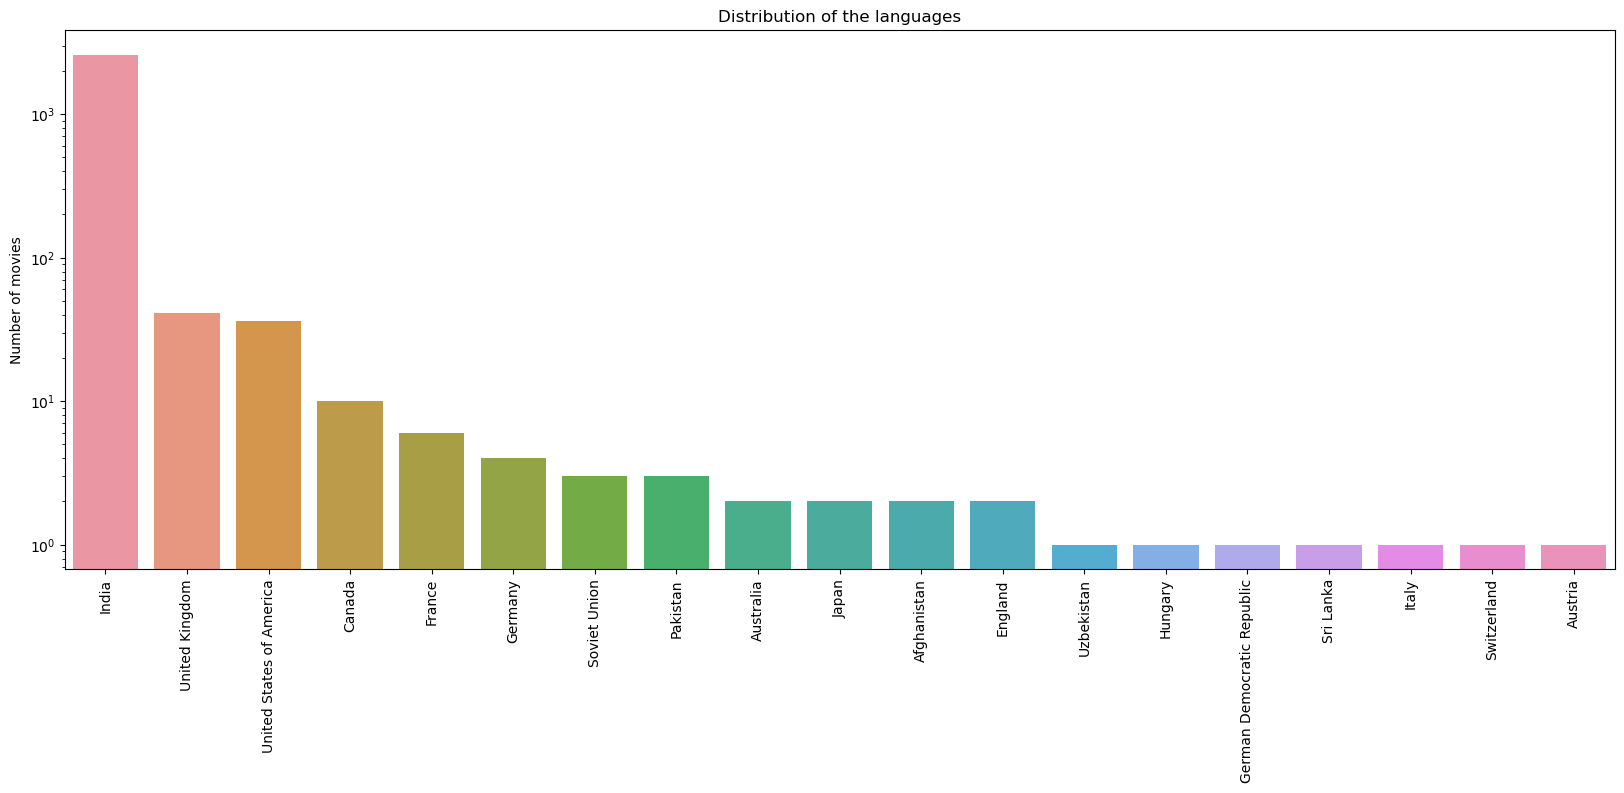

Counter({1: 2554, 0: 210, 2: 56, 3: 13, 5: 2})


In [ ]:
plt.figure(figsize=(20,7))
plt.title('Distribution of the languages')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in data_mov3['Movie_countries'].values for x in y.values()]).most_common()], y=[
            y for x, y in Counter([x for y in data_mov3['Movie_countries'].values for x in y.values()]).most_common()])
plt.xticks(rotation=90)
plt.show()

print(Counter([len(x) for x in data_mov3['Movie_countries'].values]))

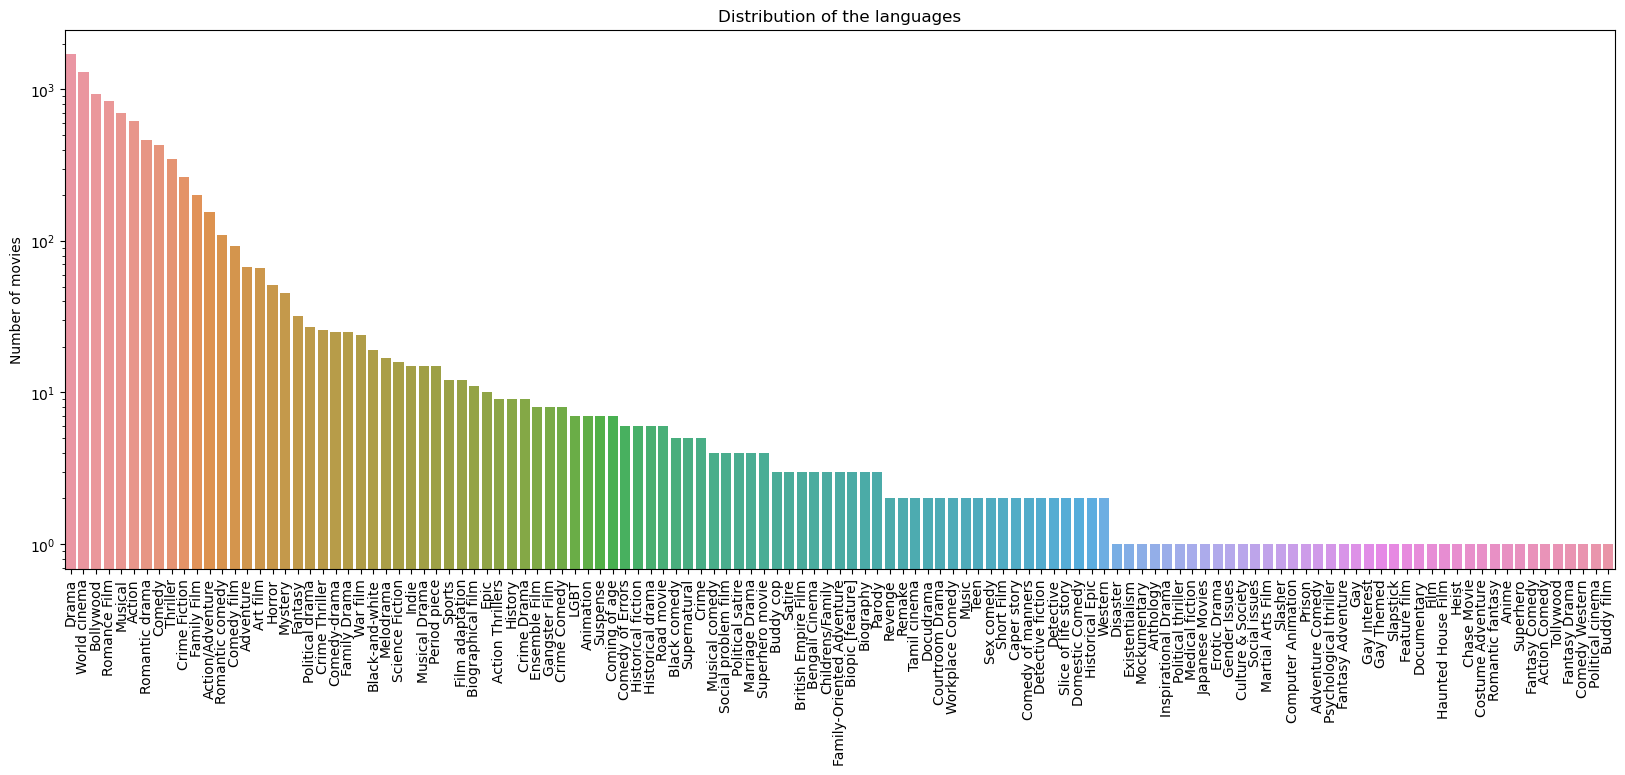

In [ ]:
plt.figure(figsize=(20,7))
plt.title('Distribution of the languages')
plt.ylabel('Number of movies')
plt.yscale('log')
sns.barplot(x=[x for x, y in Counter([x for y in data_mov3['Movie_genres'].values for x in y.values()]).most_common()], y=[
            y for x, y in Counter([x for y in data_mov3['Movie_genres'].values for x in y.values()]).most_common()])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# d3 = data[data['community']==3]
# print(d3.actor_country_of_citizenship.unique())
# print(len(d3.actor_country_of_citizenship.unique()),"nationalities")
# #sns.histplot(data = d3, x = 'actor_country_of_citizenship')
# sns.barplot(x=d3['actor_country_of_citizenship'].value_counts().index, y=d3['actor_country_of_citizenship'].value_counts().values)
# ax = plt.xticks(rotation = 90)
# plt.yscale('log')

### Community 4

In [ ]:
# d4 = data[data['community']==4]
# print(d4.actor_country_of_citizenship.unique())
# print(len(d4.actor_country_of_citizenship.unique()),"nationalities")
# #sns.histplot(data = d4, x = 'actor_country_of_citizenship')
# sns.barplot(x=d4['actor_country_of_citizenship'].value_counts().index, y=d4['actor_country_of_citizenship'].value_counts().values)
# ax = plt.xticks(rotation = 90)
# plt.yscale('log')

# Genre of movies

### Genre cleaning

In [ ]:
genre_mapping = dict([
    ('Comedy film','Comedy'),
    ('test1','bulldog'),
    ('test3','pizza')
])

def genre_cleaning(tag):
    if tag in genre_mapping.keys():
        return genre_mapping[tag]
    return tag

# do the function again to remove duplicates 

In [ ]:
t= ['test1','test2','Comedy film','abc']
list(map(genre_cleaning,t))

['bulldog', 'test2', 'Comedy', 'abc']

In [ ]:
datamov11['Movie_genres'] = datamov11['Movie_genres'].apply(lambda x: list(map(genre_cleaning,x)))
             #   [k for k, v in genre_mapping.items() if x in v][0] if len([k for k, v in genre_mapping.items() if x in v]) != 0 else x)

In [ ]:
datamov11

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,...,11,12,13,14,15,16,17,18,19,20
109,109,2574970,/m/07p15p,Big Wars,[],[Japan],"[Science Fiction, Anime, Japanese Movies, Anim...",1993.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,488,12169608,/m/02vs6jw,Ben 10: Secret of the Omnitrix,[English Language],[United States of America],"[Science Fiction, Childrens/Family, Fantasy, D...",2007.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,506,670013,/m/031f_m,Final Fantasy VII: Advent Children,[Japanese Language],[Japan],"[Thriller, Science Fiction, Japanese Movies, C...",2005.0,2.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
517,517,6773730,/m/0gn7zp,Konjiki no Gash Bell!!: 101 Banme no Mamono,[Japanese Language],[Japan],"[Anime, Japanese Movies]",2004.0,0.0,0.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,610,4704148,/m/0cj6db,Baron Omatsuri and the Secret Island,[Japanese Language],[Japan],"[Japanese Movies, Animation, Mystery, Anime, D...",2005.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,26302,4458000,/m/0c3jpx,Dream Soccer King!,[Japanese Language],[Japan],"[Short Film, Japanese Movies, Comedy, Animation]",2002.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26762,26762,25394470,/m/09g6j10,Pokémon: Zoroark: Master of Illusions,"[Japanese Language, English Language]",[],"[Action/Adventure, Thriller, Action, Fantasy]",2010.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26847,26847,30859078,/m/08dz4r,Dragon Ball Z: Bio-Broly,"[Japanese Language, English Language]",[Japan],"[Action, Anime, Japanese Movies, Science Ficti...",1994.0,0.0,0.0,...,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26907,26907,11841904,/m/02rv7tv,Seigi Choujin vs. Ancient Choujin,[Japanese Language],[Japan],"[Japanese Movies, Animation]",1985.0,0.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Counter([x for y in datamov11['Movie_genres'].values for x in y]).most_common()

[('Animation', 182),
 ('Japanese Movies', 170),
 ('Anime', 161),
 ('Action', 101),
 ('Fantasy', 87),
 ('Science Fiction', 78),
 ('Adventure', 55),
 ('Comedy', 49),
 ('World cinema', 44),
 ('Family Film', 36),
 ('Drama', 31),
 ('Childrens', 27),
 ('Thriller', 21),
 ('Action/Adventure', 20),
 ('Animated cartoon', 17),
 ('Fantasy Adventure', 16),
 ('Romance Film', 14),
 ('Short Film', 13),
 ('Childrens/Family', 11),
 ('Martial Arts Film', 9),
 ('Computer Animation', 8),
 ('Mystery', 8),
 ('Horror', 7),
 ('Childrens Fantasy', 7),
 ('Family-Oriented Adventure', 6),
 ('Fantasy Comedy', 5),
 ('Future noir', 5),
 ('Western', 4),
 ('Sports', 4),
 ('Coming of age', 3),
 ('Crime Thriller', 3),
 ('Indie', 3),
 ('Doomsday film', 2),
 ('Psychological thriller', 2),
 ('Dystopia', 2),
 ('LGBT', 2),
 ('Parody', 2),
 ('Chinese Movies', 2),
 ('Samurai cinema', 2),
 ('Romantic comedy', 2),
 ('Black-and-white', 2),
 ('Television movie', 1),
 ('Comedy-drama', 1),
 ('Supernatural', 1),
 ('Fairy tale', 1),
 (

### main genres in each community

[('Drama', 4252), ('Comedy', 3388), ('Thriller', 1975), ('Romance Film', 1696), ('Action', 1555), ('Crime Fiction', 1425)]
[('Drama', 3712), ('Black-and-white', 2307), ('Comedy', 2196), ('Romance Film', 1567), ('Action', 1231), ('Action/Adventure', 1098)]
[('Drama', 2335), ('World cinema', 1558), ('Romance Film', 1132), ('Bollywood', 1077), ('Action', 861), ('Musical', 858)]
[('Drama', 2866), ('Comedy', 1603), ('Thriller', 1176), ('Romance Film', 1012), ('Action', 900), ('Crime Fiction', 813)]
[('Drama', 1773), ('Romance Film', 757), ('Action', 717), ('World cinema', 620), ('Musical', 444), ('Comedy', 346)]
[('Chinese Movies', 829), ('World cinema', 468), ('Action', 428), ('Martial Arts Film', 381), ('Action/Adventure', 358), ('Drama', 306)]
[('Comedy', 1012), ('Family Film', 854), ('Animation', 851), ('Drama', 554), ('Short Film', 508), ('Adventure', 386)]
[('Drama', 1372), ('Comedy', 1141), ('Thriller', 792), ('Action', 760), ('Crime Fiction', 622), ('Action/Adventure', 575)]
[('Dram

<AxesSubplot:ylabel='genre'>

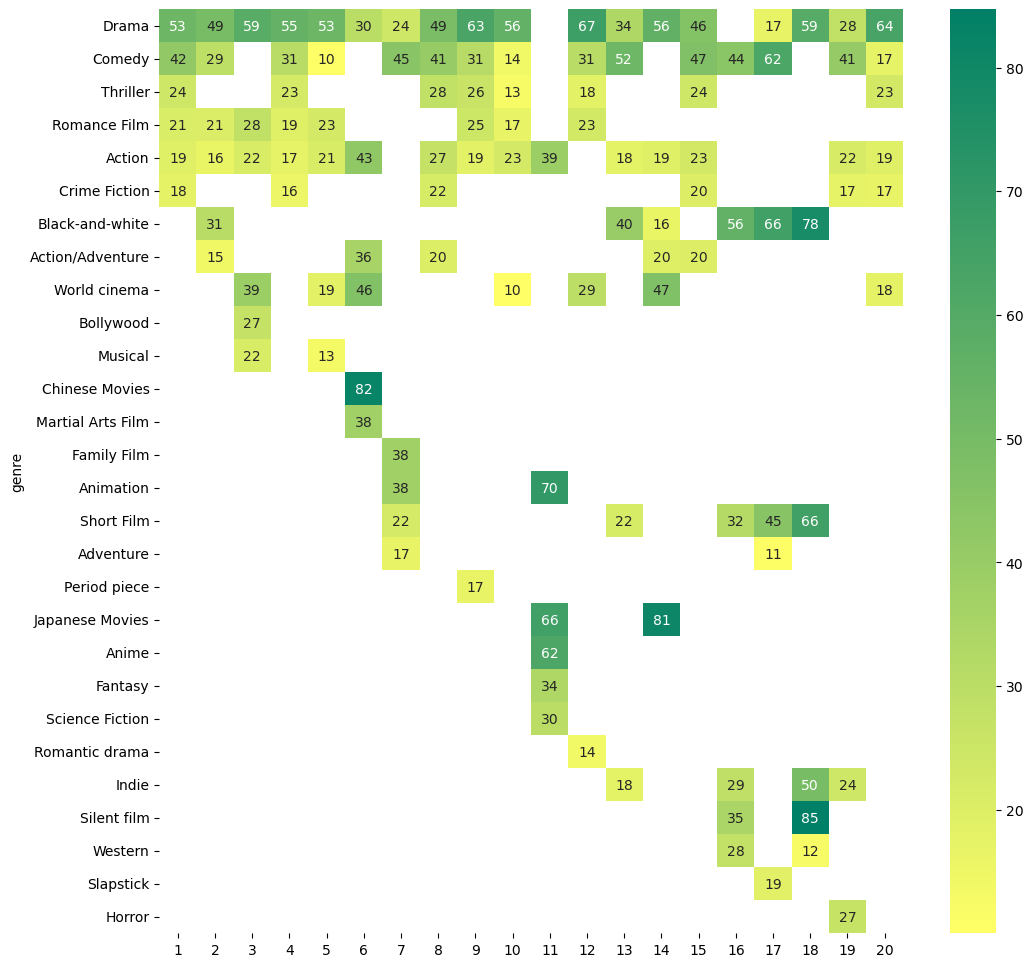

In [ ]:
n = 6

# for i in range(1,10):
#     plt.bar(x=[x for x, y in Counter([x for y in vars()['datamov' + str(i)]['Movie_genres'].values for x in y.values()]).most_common(n)], height=[
#             y for x, y in Counter([x for y in vars()['datamov' + str(i)]['Movie_genres'].values for x in y.values()]).most_common(n)])
#     plt.xticks(rotation=90)
#     plt.show()

i=1

first_genres = pd.DataFrame(columns=['genre'])
for i in range(1,21):
    genres = Counter([x for y in vars()['datamov' + str(i)]['Movie_genres'].values for x in y]).most_common(n)
    print(genres)
    genres = pd.DataFrame(data=genres, columns=['genre',str(i)])
    first_genres = first_genres.merge(genres,how='outer',on='genre')
    normalization = len(vars()['datamov' + str(i)])
    first_genres[str(i)]= first_genres[str(i)].apply(lambda x : x/normalization*100)

first_genres.set_index(['genre'],inplace = True)
plt.figure(figsize=(12,12))
sns.heatmap(data=first_genres,cmap = 'summer_r',annot=True)

In [ ]:
d2[(~(d2['actor_country_of_citizenship']=='India')& ~(d2['actor_country_of_citizenship']=='British Raj'))]
d2[(d2['actor_country_of_citizenship']=='France')]

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_languages,Movie_countries,Movie_genres,Movie_release_year,1,2,...,11,12,13,14,15,16,17,18,19,20
101,101,14739568,/m/03gw63h,Hula-La-La,[English Language],[United States of America],"[Short Film, Comedy, Black-and-white, Slapstick]",1951.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
114,114,21236198,/m/05c4c72,Thief of Damascus,[English Language],[United States of America],"[Romance Film, Fantasy, Adventure]",1952.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
174,174,44218,/m/0c1p3,San Francisco,[English Language],[United States of America],"[Disaster, Romance Film, Drama, Natural disast...",1936.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
243,243,24051028,/m/07kgp1w,No Time for Sergeants,[English Language],[United States of America],"[Slapstick, Drama, Comedy, Black-and-white, Fi...",1958.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
244,244,14734420,/m/03gvzxy,Pies and Guys,[English Language],[United States of America],"[Short Film, Comedy, Black-and-white]",1958.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27113,27113,8004497,/m/026n72t,Rhythm and Weep,[English Language],[United States of America],"[Short Film, Comedy, Black-and-white, Slapstick]",1946.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
27137,27137,3941009,/m/0b7v0f,The Man They Could Not Hang,[English Language],[United States of America],"[Horror, Black-and-white]",1939.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
27146,27146,6736424,/m/0glc67,Beer and Pretzels,[English Language],[United States of America],"[Short Film, Screwball comedy, Comedy of manne...",1933.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
27155,27155,14738984,/m/03gw5m9,Studio Stoops,[English Language],[United States of America],"[Short Film, Comedy, Black-and-white]",1950.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0


# Community 3 

['United States of America' 'Canada' 'United Kingdom' nan 'Germany'
 'Italy' 'Honduras' 'New Zealand' 'Australia' 'Puerto Rico' 'Philippines'
 'Mexico' 'South Africa' 'Republic of Ireland']
14 nationalities


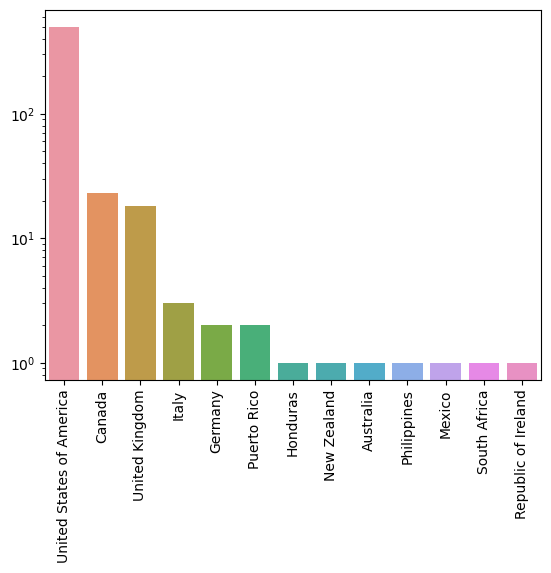

In [ ]:
d3 = data[data['community']==3]
print(d3.actor_country_of_citizenship.unique())
print(len(d3.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d3, x = 'actor_country_of_citizenship')
sns.barplot(x=d3['actor_country_of_citizenship'].value_counts().index, y=d3['actor_country_of_citizenship'].value_counts().values)
ax = plt.xticks(rotation = 90)
plt.yscale('log')

### Community 4

['United Kingdom' 'Canada' 'United States of America' 'Australia'
 'England' 'Scotland' 'New Zealand' 'Wales' 'Egypt' 'South Africa'
 'Germany' 'Republic of Ireland' 'Kingdom of the Netherlands'
 'United Kingdom of Great Britain and Ireland' 'France' nan
 "People's Republic of China" 'Italy' 'Sweden' 'Argentina' 'Norway'
 'Spain' 'Mexico' 'Pakistan' 'Poland' 'Hungary' 'Colombia' 'Lithuania'
 'Armenia' 'India' 'Austria']
31 nationalities


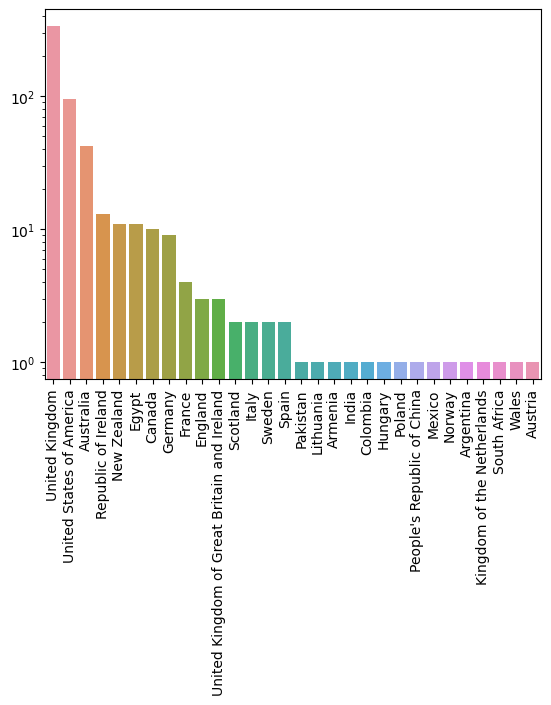

In [ ]:
d4 = data[data['community']==4]
print(d4.actor_country_of_citizenship.unique())
print(len(d4.actor_country_of_citizenship.unique()),"nationalities")
#sns.histplot(data = d4, x = 'actor_country_of_citizenship')
sns.barplot(x=d4['actor_country_of_citizenship'].value_counts().index, y=d4['actor_country_of_citizenship'].value_counts().values)
ax = plt.xticks(rotation = 90)
plt.yscale('log')
datamov17